# Исследовательский анализ данных системы нагрузки проводов ЛЭП и метеостанции

## Введение

Цель настоящей работы - исследовательский анализ данных системы нагрузки проводов ЛЭП и метеостанции для поиска зависимостей между углами кручения и наклона устройств от метеоданных. Такие зависимости в будущем могут помочь в целях предупреждения аварий из-за гололёдной активности на ЛЭП.

Монтаж Метеостанции и устройств СКН производился на линии электропередачи «двухцепная ВЛ 110 кВ «Айхал-Юбилейная №1» с отпайкой на ПС «Хвостовое хозяйство» и «Айхал-Юбилейная №2» с отпайкой на «ПС Хвостовое хозяйство» (далее – ЛЭП). 

Даты проведения монтажа: с 30.01.2023г. по 02.02.2023г.

Метеостанция и Блок преобразования протоколов СКН устанавливались на опоре №10 ЛЭП (Рис. 1).

<img src="pic-1.jpg" width=724 height=504 />

Блоки измерительные в количестве 6 шт. устанавливались на одном проводе ЛЭП. В одном пролете ЛЭП монтировалось одно устройство (Рис. 2). Устройства №1.1, №1.2, №1.3 монтировались в пролетах по одну сторону от Метеостанции, устройства №2.1, №2.2, №2.3 – по другую (Рис. 3)

<img src="pic-2.jpg" width=583 height=433 />

<img src="pic-3.jpg" width=590 height=471 />

## Описание данных

Параметры, измеряемые блоком измерительным СКН:

- угол наклона (`torsionAngle`);

- среднеквадратичное отклонение угла наклона в процентах (`torsionAngleDeviation`);

- угол кручения (`tiltAngle`);

- среднеквадратичное отклонение угла кручения в процентах (`tiltAngleDeviation`);

- температура провода (`wireTemperature`);

- напряжение внутренней батареи питания (`batteryVoltage`);

- наличие/отсутствие внешнего питания от фазного провода (`ctState`).

И метеостанцией:

- давление (`Pressure`);
- относительная влажность (`Relative humidity`);
- направление ветра (`Wind direction`);
- температура (`Temperature`).

В данных направление «Север» принято за 0°, «Юг» - 180°, «Запад» - 270°, «Восток» - 90°.

Также стоит отметить отключение Блока измерительного СКН №1.2 20-го февраля ввиду недостаточного внешнего питания от фазного провода. Данная причина отключения объясняется конструкцией платы питания рассматриваемого устройства, которая не обеспечивает достаточный уровень заряда внутренних аккумулирующих батарей.

В настоящей работе проивзодится анализ данных с **14.02.2023 по 07.03.2023**.

## Импорт бибилиотек и данных

Загрузим библиотеки:

In [53]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings("ignore")

Загрузим предварительно выгруженные данные по группам:

In [2]:
group_1_raw = pd.read_excel('SKN_Aikhal(Sokol-M2)_all_data_wtih_14_02.xlsx', sheet_name='1')

In [3]:
group_2_raw = pd.read_excel('SKN_Aikhal(Sokol-M2)_all_data_wtih_14_02.xlsx', sheet_name='2')

## Первый взягляд на данные и их предобработка

Посмотрим первые пять строк основную информацию о датафреймах:

In [4]:
group_1_raw.head()

,date,1;3;tiltAngle,1;3;tiltAngleDeviation,1;3;ctState,1;3;torsionAngle,1;3;wireTemperature,1;3;torsionAngleDeviation,1;3;batteryVoltage,1;2;torsionAngleDeviation,1;2;torsionAngle,...,1;1;torsionAngleDeviation,1;1;torsionAngle,1;1;wireTemperature,1;1;batteryVoltage,1;1;tiltAngle,1;1;ctState,Pressure,Relative humidity,Wind direction,Temperature
0,2023-02-14 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,235.0,-18.60
1,2023-02-14 05:18:00,2.83,0.0,1.0,-5.87,-14.2,1.0,4.1,1.0,-8.15,...,3.0,-5.16,-14.9,4.1,0.29,1.0,NaN,NaN,NaN,NaN
2,2023-02-14 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,249.0,-18.60
3,2023-02-14 05:27:00,2.65,1.0,1.0,-5.82,-13.8,1.0,4.1,2.0,-8.30,...,4.0,-4.51,-14.5,4.1,-0.57,1.0,NaN,NaN,NaN,NaN
4,2023-02-14 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.29,77.0,261.0,-19.08


In [5]:
group_1_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4596 non-null   datetime64[ns]
 1   1;3;tiltAngle              2951 non-null   float64       
 2   1;3;tiltAngleDeviation     2951 non-null   float64       
 3   1;3;ctState                2951 non-null   float64       
 4   1;3;torsionAngle           2951 non-null   float64       
 5   1;3;wireTemperature        2951 non-null   float64       
 6   1;3;torsionAngleDeviation  2951 non-null   float64       
 7   1;3;batteryVoltage         2951 non-null   float64       
 8   1;2;torsionAngleDeviation  921 non-null    float64       
 9   1;2;torsionAngle           921 non-null    float64       
 10  1;2;batteryVoltage         921 non-null    float64       
 11  1;2;ctState                921 non-null    float64       
 12  1;2;ti

In [6]:
group_2_raw.head()

,date,2;3;ctState,2;3;batteryVoltage,2;3;torsionAngleDeviation,2;3;tiltAngle,2;3;wireTemperature,2;3;tiltAngleDeviation,2;3;torsionAngle,2;2;torsionAngle,2;2;tiltAngle,...,2;1;tiltAngle,2;1;torsionAngle,2;1;wireTemperature,2;1;torsionAngleDeviation,2;1;ctState,2;1;batteryVoltage,Pressure,Relative humidity,Wind direction,Temperature
0,2023-02-14 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,235.0,-18.60
1,2023-02-14 05:18:00,1.0,4.2,2.0,-2.83,-11.1,1.0,-1.36,-3.67,-4.21,...,3.28,-1.24,-8.6,1.0,1.0,4.2,NaN,NaN,NaN,NaN
2,2023-02-14 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,249.0,-18.60
3,2023-02-14 05:27:00,1.0,4.2,3.0,-3.07,-8.6,3.0,-1.69,-3.26,-3.70,...,3.34,-0.86,-7.3,2.0,1.0,4.2,NaN,NaN,NaN,NaN
4,2023-02-14 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.29,77.0,261.0,-19.08


In [7]:
group_2_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4596 entries, 0 to 4595
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   date                       4596 non-null   datetime64[ns]
 1   2;3;ctState                2954 non-null   float64       
 2   2;3;batteryVoltage         2954 non-null   float64       
 3   2;3;torsionAngleDeviation  2954 non-null   float64       
 4   2;3;tiltAngle              2954 non-null   float64       
 5   2;3;wireTemperature        2954 non-null   float64       
 6   2;3;tiltAngleDeviation     2954 non-null   float64       
 7   2;3;torsionAngle           2954 non-null   float64       
 8   2;2;torsionAngle           2946 non-null   float64       
 9   2;2;tiltAngle              2946 non-null   float64       
 10  2;2;tiltAngleDeviation     2946 non-null   float64       
 11  2;2;torsionAngleDeviation  2946 non-null   float64       
 12  2;2;ct

В данных наблюдается значительное число пропусков, вычислим их долю:

In [8]:
group_1_raw.isna().mean(), group_2_raw.isna().mean()

(date                         0.000000
 1;3;tiltAngle                0.357920
 1;3;tiltAngleDeviation       0.357920
 1;3;ctState                  0.357920
 1;3;torsionAngle             0.357920
 1;3;wireTemperature          0.357920
 1;3;torsionAngleDeviation    0.357920
 1;3;batteryVoltage           0.357920
 1;2;torsionAngleDeviation    0.799608
 1;2;torsionAngle             0.799608
 1;2;batteryVoltage           0.799608
 1;2;ctState                  0.799608
 1;2;tiltAngleDeviation       0.799608
 1;2;wireTemperature          0.799608
 1;2;tiltAngle                0.799608
 1;1;tiltAngleDeviation       0.358138
 1;1;torsionAngleDeviation    0.358138
 1;1;torsionAngle             0.358138
 1;1;wireTemperature          0.358138
 1;1;batteryVoltage           0.358138
 1;1;tiltAngle                0.358138
 1;1;ctState                  0.358138
 Pressure                     0.348782
 Relative humidity            0.348782
 Wind direction               0.348782
 Temperature             

Визуализируем пропуски:

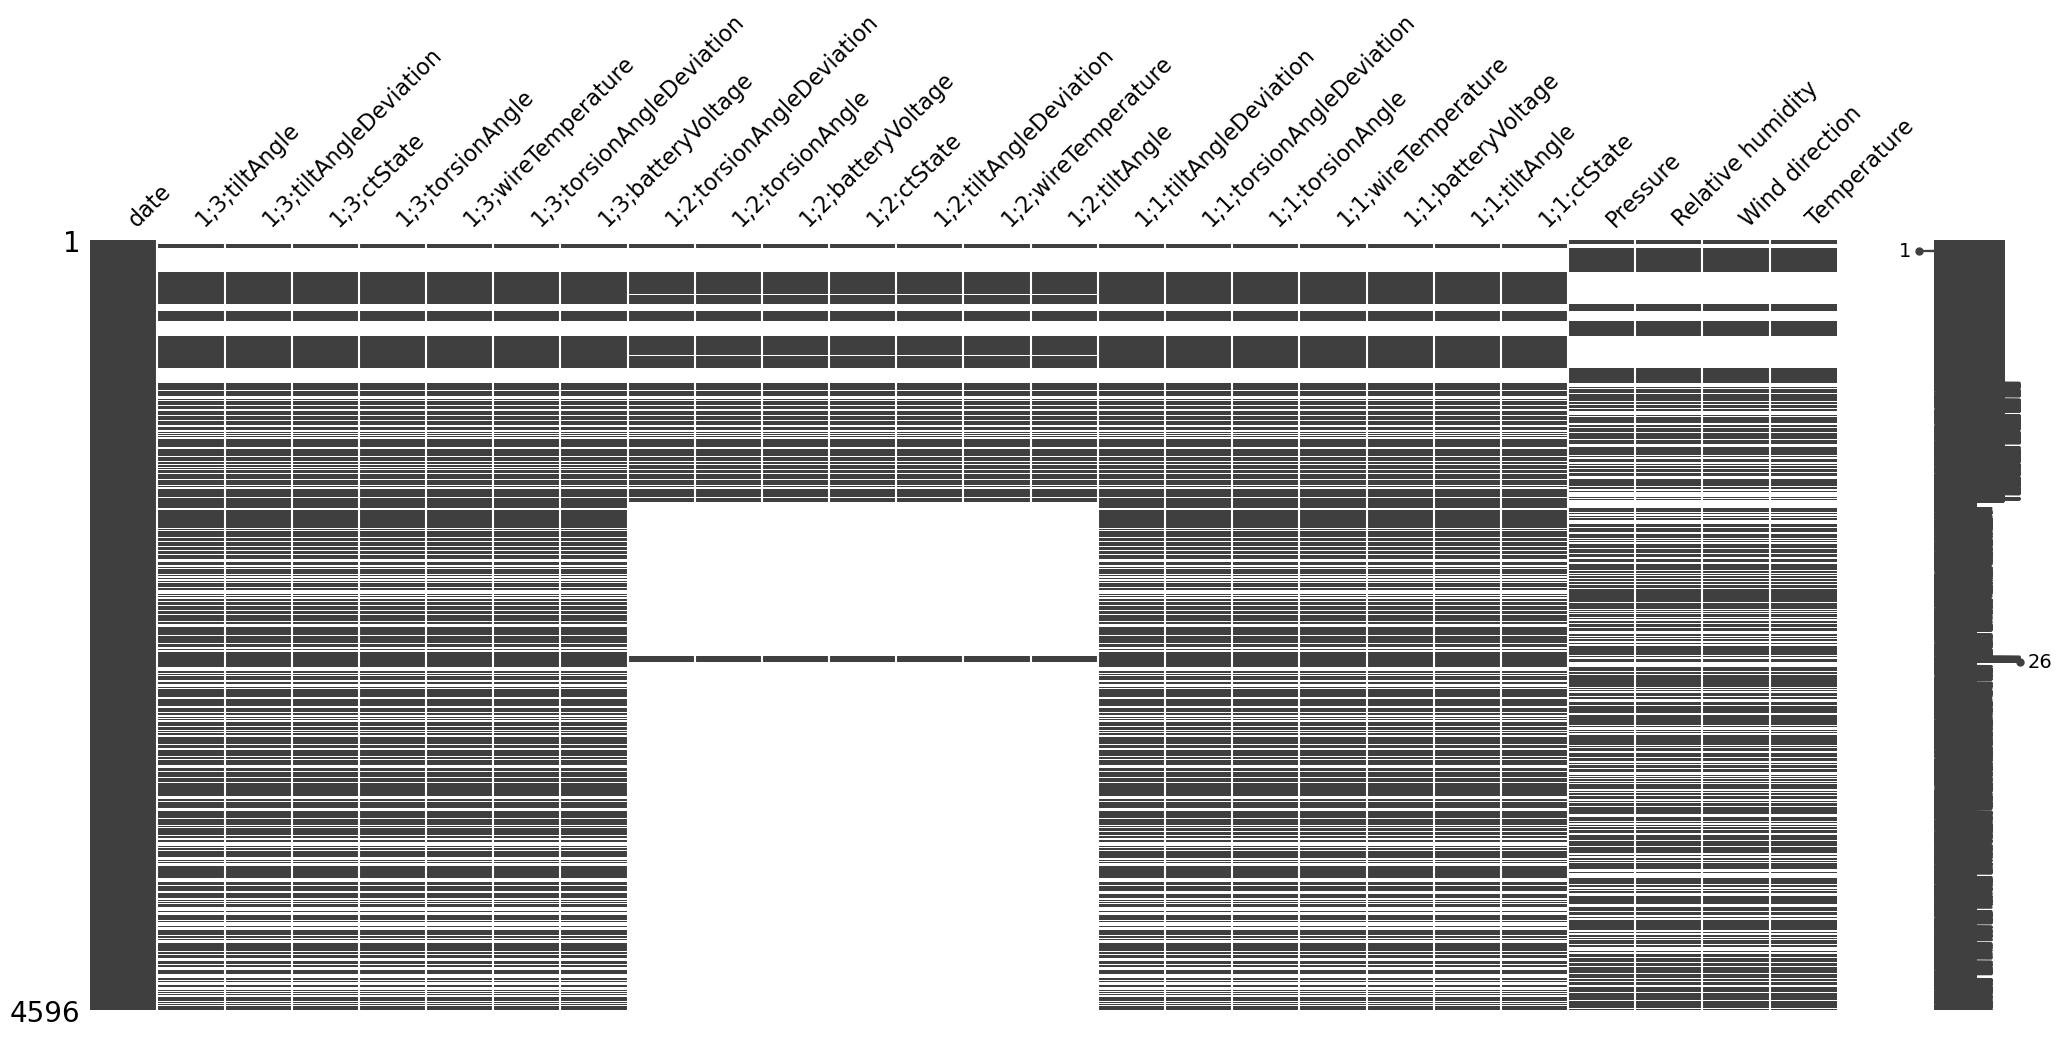

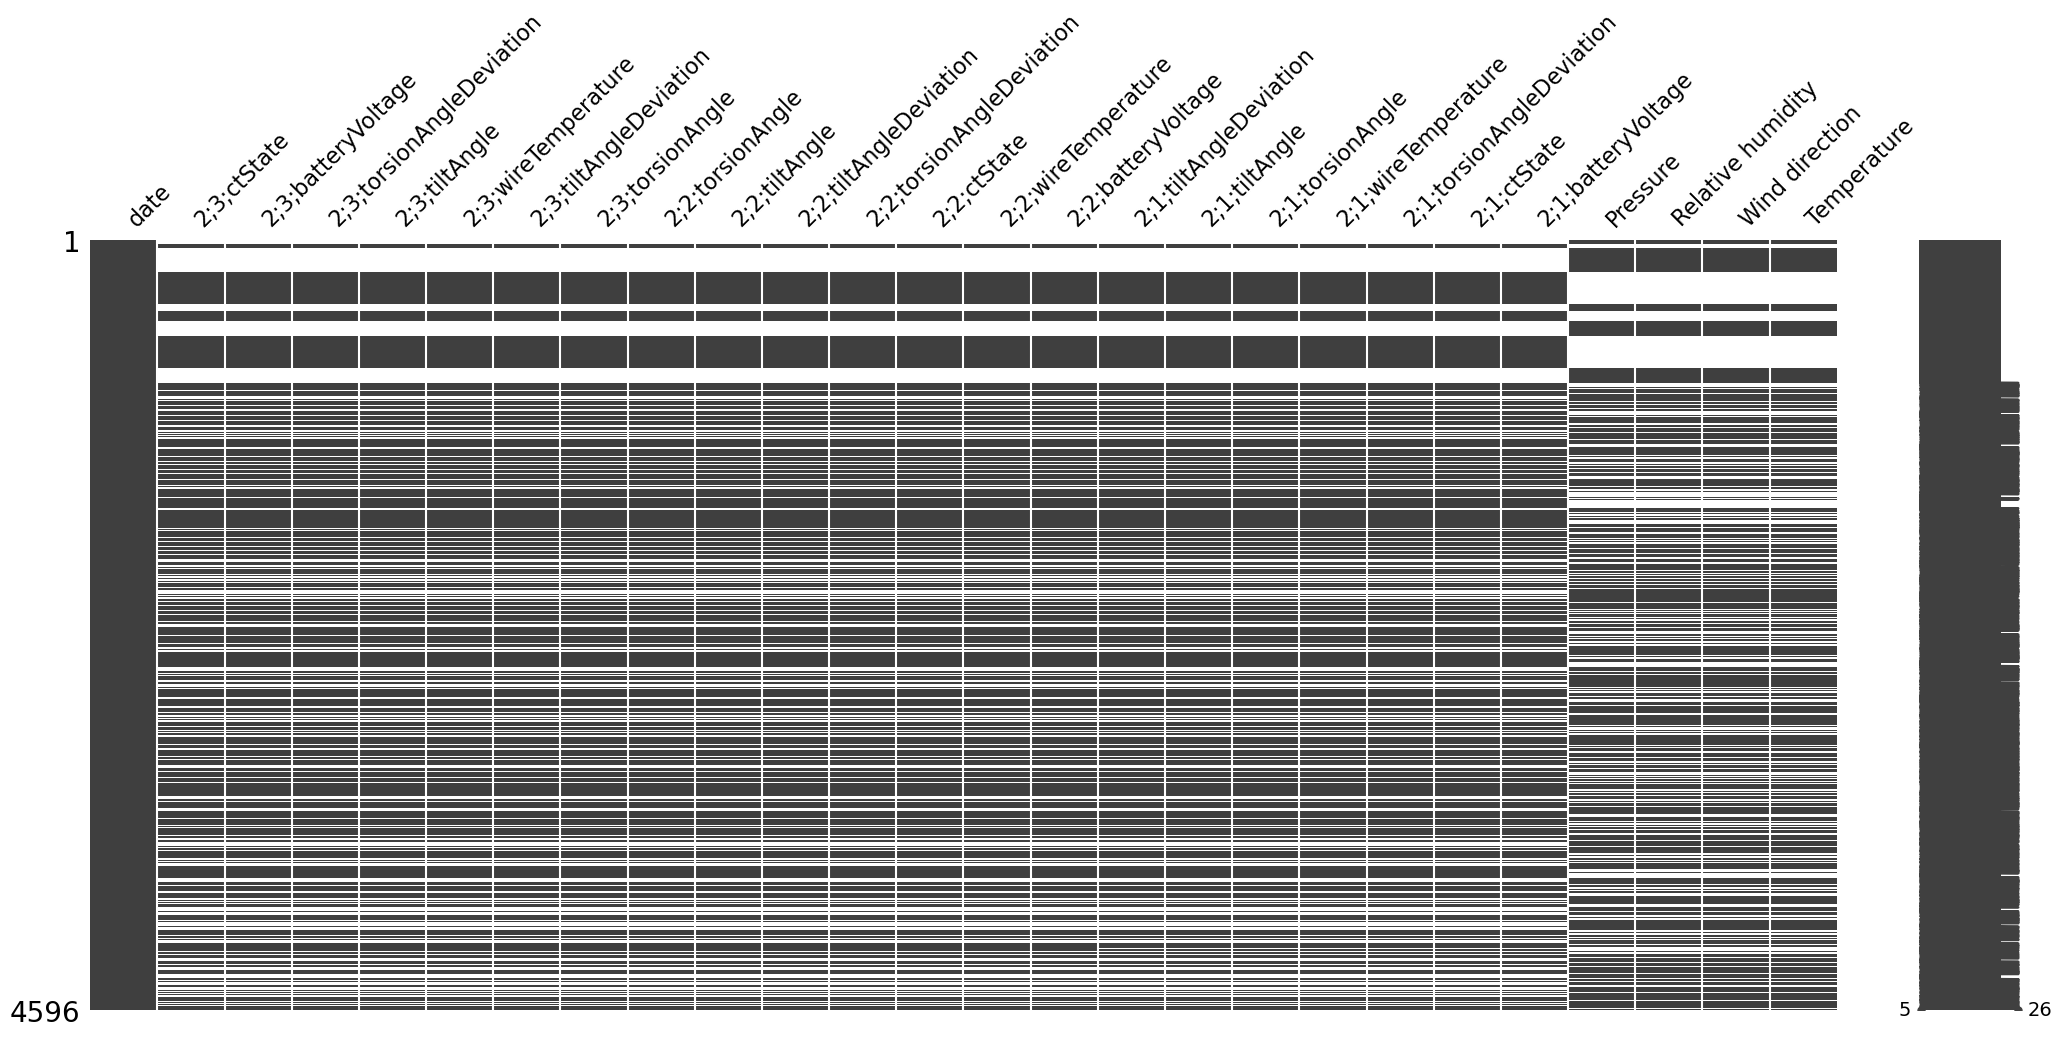

In [9]:
msno.matrix(group_1_raw)
msno.matrix(group_2_raw);

Самую значительную долю пропусков имеют данные с СКН 1.2 (около 80%) - в пункте работы описание данных упоминалось, что устройство было отключено из-за недостаточного пиатния, его следует исключить из анализа. Остальные пропуски связаны со спецификой отправки данных с метеостанции и СКН. Метеостанция отправляет данные каждые 10 минут, а СКН может немного запаздывать. Необходима предобработка данных с условием:

1) если после отправки данных метеостанцией в течении не более 10 минут приходят данные с СКН - объеденить эти данные с меткой времени данных метеостанции;

2) если после отправки данных метеостанцией в течении не более 10 минут данные с СКН так и не пришли - поставить `None`;

3) если данные метеостанции и СКН совпали по метке времени ничего не делать.

### Предобработка первой группы данных

Для контроля неизбежной потери данных при предобработке запишем длинну серии метеоданных (самое большое число ненулевых объектов не считая метки времени):

In [10]:
len_before_1 = len(group_1_raw['Temperature'].dropna())

In [11]:
len_before_1

2993

Выполним предобработку данных первой группы, затем повторим алгоритм действий со второй группой данных. Сначала отбросим из датафрейма неработающее устройство:

In [12]:
group_1_raw = group_1_raw.drop(['1;2;torsionAngleDeviation',
                                '1;2;torsionAngle',
                                '1;2;batteryVoltage',
                                '1;2;ctState',
                                '1;2;tiltAngleDeviation',
                                '1;2;wireTemperature',
                                '1;2;tiltAngle'], axis=1)

Теперь, выделим данные которые совпали по метке времени по временный датафрейм:

In [13]:
group_1_temp = group_1_raw.dropna().reset_index(drop=True)

Для контроля потери полезных данных вычислим и запишем длину исходного и нового датафреймов:

In [14]:
len_group_1_raw = len(group_1_raw)
len_group_1_raw

4596

In [15]:
len_group_1_temp = len(group_1_temp)
len_group_1_temp

1349

В другой датафрейм выделим остальные данные:

In [16]:
group_1_other = group_1_raw[~group_1_raw['date'].isin(group_1_temp['date'])]

Вычислим и запишем длину датафрейма:

In [17]:
len_group_1_other = len(group_1_other)
len_group_1_other

3247

Проверим, не потеряли ли мы данные:

In [18]:
len_group_1_raw - len_group_1_temp - len_group_1_other

0

Все данные на месте, займемся предобработкой данных, у которых не совпала метка времени. Выведем первые пять строк:

In [19]:
group_1_other.head()

,date,1;3;tiltAngle,1;3;tiltAngleDeviation,1;3;ctState,1;3;torsionAngle,1;3;wireTemperature,1;3;torsionAngleDeviation,1;3;batteryVoltage,1;1;tiltAngleDeviation,1;1;torsionAngleDeviation,1;1;torsionAngle,1;1;wireTemperature,1;1;batteryVoltage,1;1;tiltAngle,1;1;ctState,Pressure,Relative humidity,Wind direction,Temperature
0,2023-02-14 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,235.0,-18.60
1,2023-02-14 05:18:00,2.83,0.0,1.0,-5.87,-14.2,1.0,4.1,2.0,3.0,-5.16,-14.9,4.1,0.29,1.0,NaN,NaN,NaN,NaN
2,2023-02-14 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,249.0,-18.60
3,2023-02-14 05:27:00,2.65,1.0,1.0,-5.82,-13.8,1.0,4.1,3.0,4.0,-4.51,-14.5,4.1,-0.57,1.0,NaN,NaN,NaN,NaN
4,2023-02-14 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,946.29,77.0,261.0,-19.08


И визуализацию пропусков:

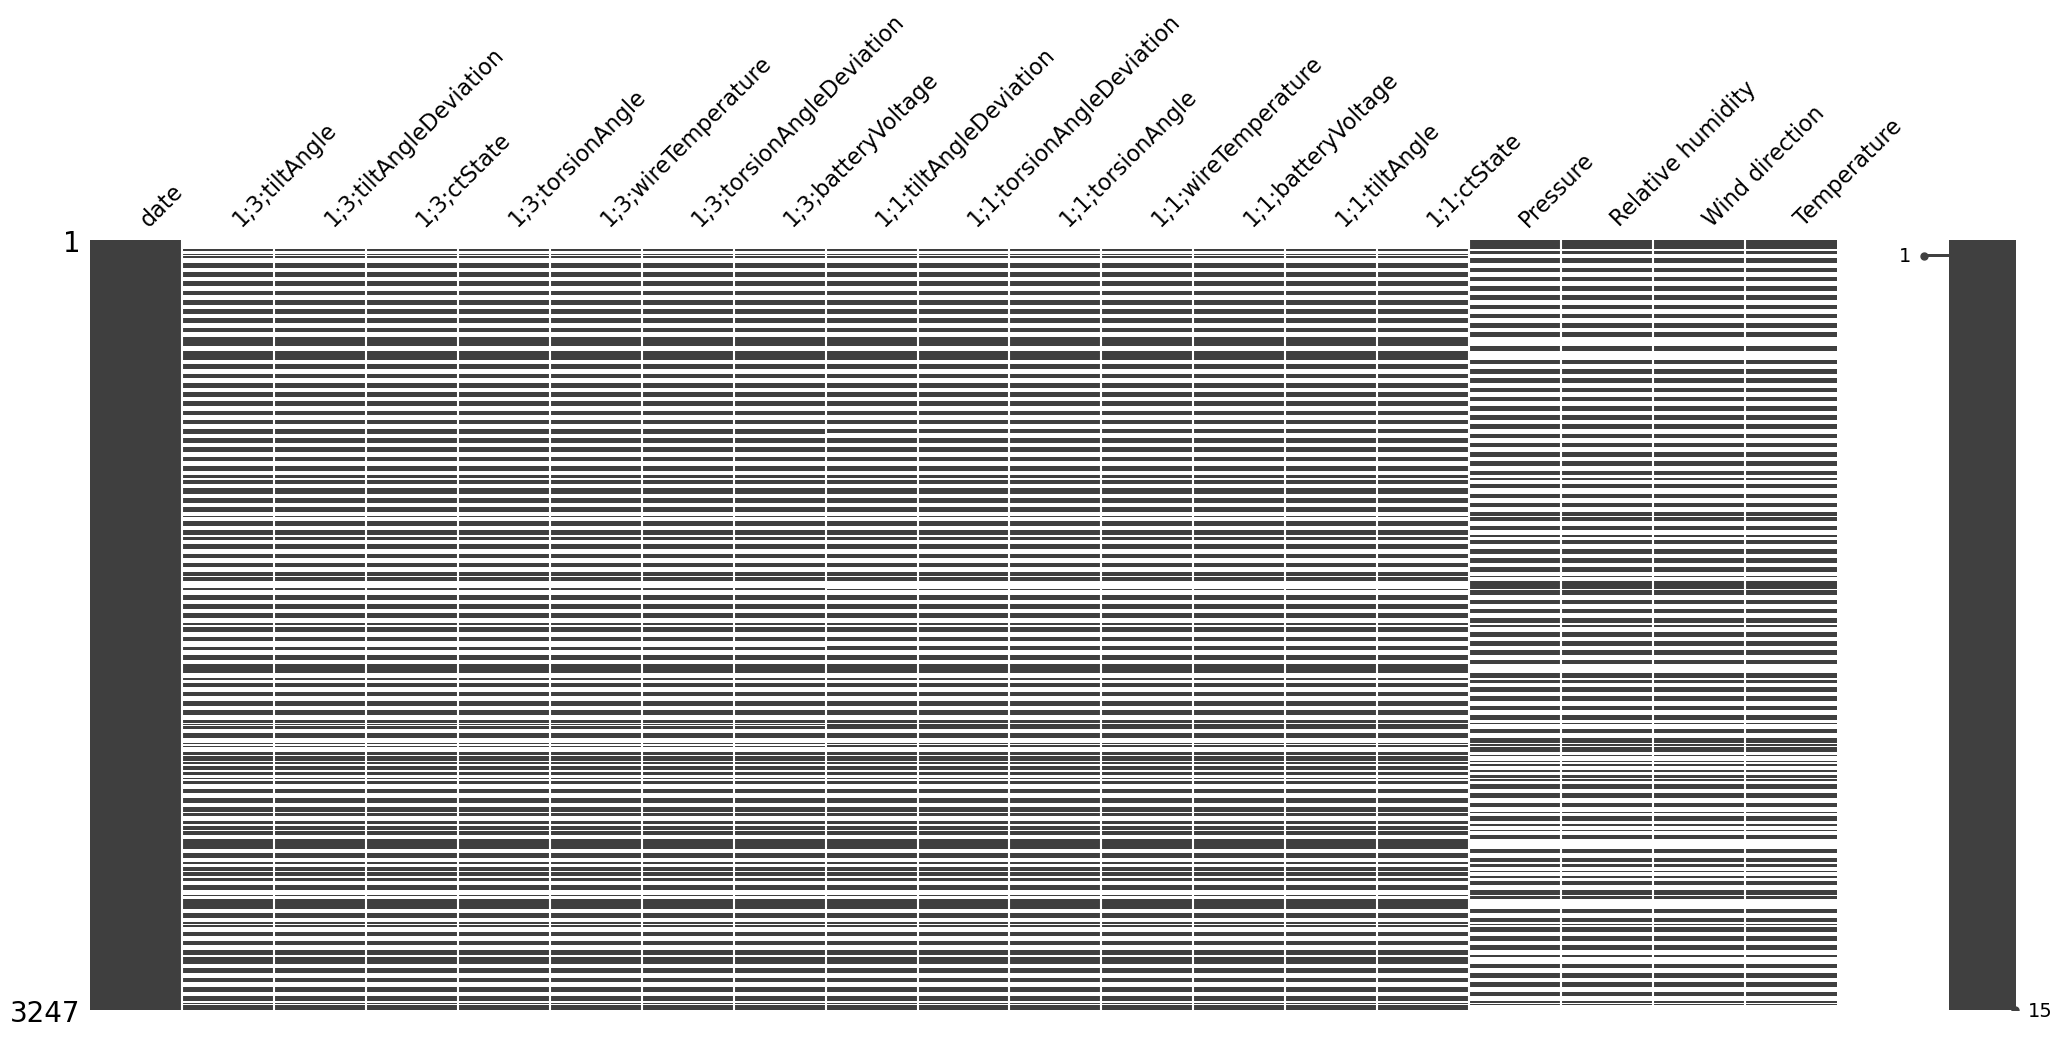

In [20]:
msno.matrix(group_1_other);

Для компенсации запаздывания выполним сдвиг данных СКН на 1 индекс относительно метеоданных:

In [21]:
group_1_other_skn = group_1_other[group_1_other.columns[1:15]].shift(-1)

In [22]:
group_1_other_meteo = pd.concat([group_1_other[group_1_other.columns[15:19]], group_1_other['date']], axis=1)

Объединим данные:

In [23]:
group_1_other = pd.concat([group_1_other_meteo, group_1_other_skn], axis=1)

Выведем первые 5 строк:

In [24]:
group_1_other.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,1;3;tiltAngle,1;3;tiltAngleDeviation,1;3;ctState,1;3;torsionAngle,1;3;wireTemperature,1;3;torsionAngleDeviation,1;3;batteryVoltage,1;1;tiltAngleDeviation,1;1;torsionAngleDeviation,1;1;torsionAngle,1;1;wireTemperature,1;1;batteryVoltage,1;1;tiltAngle,1;1;ctState
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,2.83,0.0,1.0,-5.87,-14.2,1.0,4.1,2.0,3.0,-5.16,-14.9,4.1,0.29,1.0
1,NaN,NaN,NaN,NaN,2023-02-14 05:18:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,2.65,1.0,1.0,-5.82,-13.8,1.0,4.1,3.0,4.0,-4.51,-14.5,4.1,-0.57,1.0
3,NaN,NaN,NaN,NaN,2023-02-14 05:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,2.98,0.0,1.0,-5.76,-13.7,1.0,4.1,2.0,3.0,-5.26,-14.3,4.2,0.36,1.0


Визуализируем пропуски:

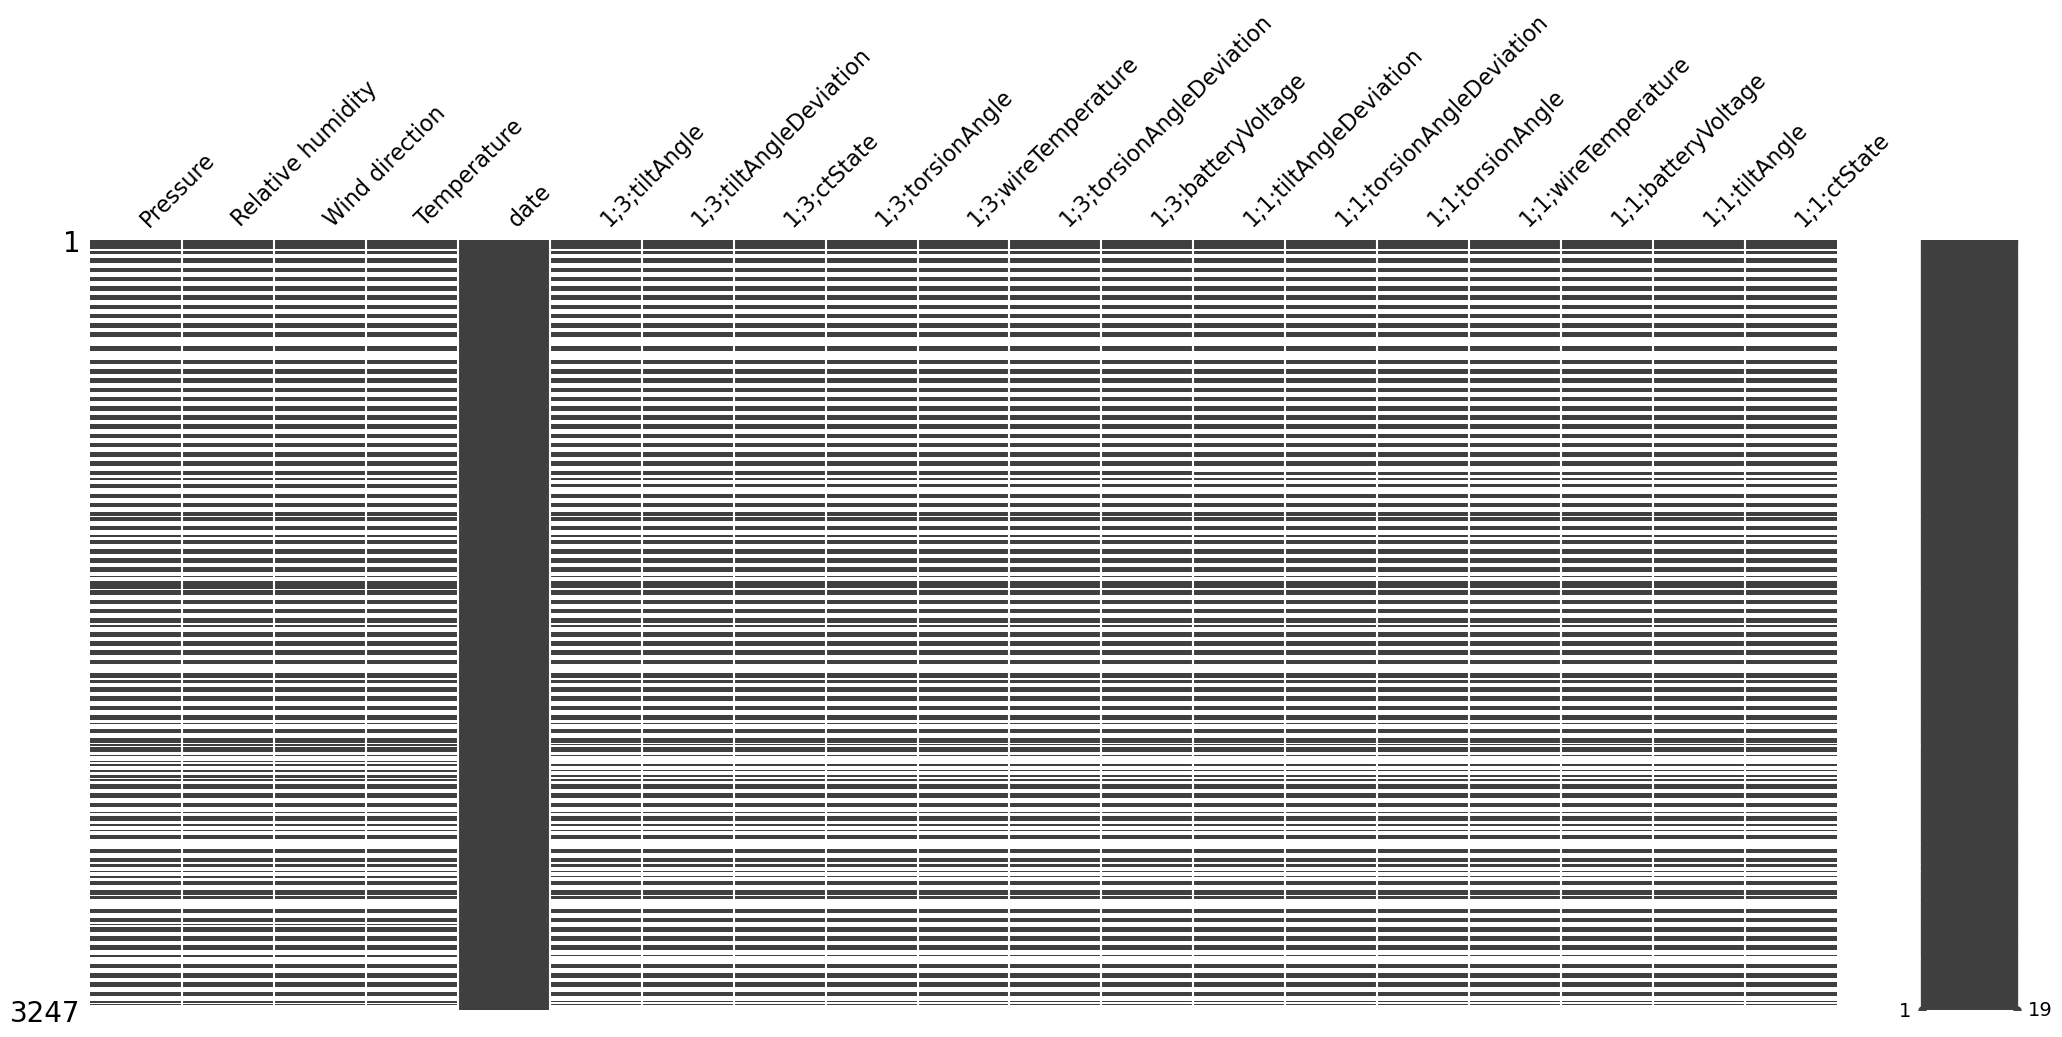

In [25]:
msno.matrix(group_1_other);

Отлично, данные приведены в соответствие. Теперь удалим пустые строки и объедним все данные первой группы:

In [26]:
group_1 = pd.concat([group_1_other.dropna().reset_index(drop=True), group_1_temp])

Выведем первые 5 строк и основную информацию о датафрейме:

In [27]:
group_1.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,1;3;tiltAngle,1;3;tiltAngleDeviation,1;3;ctState,1;3;torsionAngle,1;3;wireTemperature,1;3;torsionAngleDeviation,1;3;batteryVoltage,1;1;tiltAngleDeviation,1;1;torsionAngleDeviation,1;1;torsionAngle,1;1;wireTemperature,1;1;batteryVoltage,1;1;tiltAngle,1;1;ctState
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,2.83,0.0,1.0,-5.87,-14.2,1.0,4.1,2.0,3.0,-5.16,-14.9,4.1,0.29,1.0
1,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,2.65,1.0,1.0,-5.82,-13.8,1.0,4.1,3.0,4.0,-4.51,-14.5,4.1,-0.57,1.0
2,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,2.98,0.0,1.0,-5.76,-13.7,1.0,4.1,2.0,3.0,-5.26,-14.3,4.2,0.36,1.0
3,946.29,78.0,256.0,-17.84,2023-02-14 05:45:00,3.00,0.0,1.0,-5.85,-13.5,0.0,4.1,1.0,1.0,-5.42,-13.8,4.1,0.36,1.0
4,946.29,78.0,238.0,-17.84,2023-02-14 05:55:00,2.97,0.0,1.0,-5.85,-13.6,0.0,4.1,0.0,1.0,-5.53,-14.2,4.1,0.28,1.0


In [28]:
group_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2941 entries, 0 to 1348
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Pressure                   2941 non-null   float64       
 1   Relative humidity          2941 non-null   float64       
 2   Wind direction             2941 non-null   float64       
 3   Temperature                2941 non-null   float64       
 4   date                       2941 non-null   datetime64[ns]
 5   1;3;tiltAngle              2941 non-null   float64       
 6   1;3;tiltAngleDeviation     2941 non-null   float64       
 7   1;3;ctState                2941 non-null   float64       
 8   1;3;torsionAngle           2941 non-null   float64       
 9   1;3;wireTemperature        2941 non-null   float64       
 10  1;3;torsionAngleDeviation  2941 non-null   float64       
 11  1;3;batteryVoltage         2941 non-null   float64       
 12  1;1;ti

Вычислим долю потери данных при предобработке:

In [29]:
1 - len(group_1) / len_before_1

0.017373872368860677

Первая группа данных готова. Потери данных при предобработке не более 1.75%.

### Предобработка второй группы данных

Для контроля неизбежной потери данных при предобработке запишем длинну серии метеоданных (самое большое число ненулевых объектов не считая метки времени):

In [30]:
len_before_2 = len(group_2_raw['Temperature'].dropna())

In [31]:
len_before_2

2993

Проведем аналогичные операции со второй группой данных, не забудем учесть различия - в первой группе данных только два устройства СКН (второе устройство отключено - см. введение).

Выделим данные которые совпали по метке времени по временный датафрейм:

In [32]:
group_2_temp = group_2_raw.dropna().reset_index(drop=True)

Для контроля потери полезных данных вычислим и запишем длину исходного и нового датафреймов:

In [33]:
len_group_2_raw = len(group_2_raw)
len_group_2_raw

4596

In [34]:
len_group_2_temp = len(group_2_temp)
len_group_2_temp

1350

В другой датафрейм выделим остальные данные:

In [35]:
group_2_other = group_2_raw[~group_2_raw['date'].isin(group_2_temp['date'])]

Вычислим и запишем длину датафрейма:

In [36]:
len_group_2_other = len(group_2_other)
len_group_2_other

3246

Проверим, не потеряли ли мы данные:

In [37]:
len_group_2_raw - len_group_2_temp - len_group_2_other

0

Все данные на месте, займемся предобработкой данных, у которых не совпала метка времени. Выведем первые пять строк:

In [38]:
group_2_other.head()

,date,2;3;ctState,2;3;batteryVoltage,2;3;torsionAngleDeviation,2;3;tiltAngle,2;3;wireTemperature,2;3;tiltAngleDeviation,2;3;torsionAngle,2;2;torsionAngle,2;2;tiltAngle,...,2;1;tiltAngle,2;1;torsionAngle,2;1;wireTemperature,2;1;torsionAngleDeviation,2;1;ctState,2;1;batteryVoltage,Pressure,Relative humidity,Wind direction,Temperature
0,2023-02-14 05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,235.0,-18.60
1,2023-02-14 05:18:00,1.0,4.2,2.0,-2.83,-11.1,1.0,-1.36,-3.67,-4.21,...,3.28,-1.24,-8.6,1.0,1.0,4.2,NaN,NaN,NaN,NaN
2,2023-02-14 05:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.38,78.0,249.0,-18.60
3,2023-02-14 05:27:00,1.0,4.2,3.0,-3.07,-8.6,3.0,-1.69,-3.26,-3.70,...,3.34,-0.86,-7.3,2.0,1.0,4.2,NaN,NaN,NaN,NaN
4,2023-02-14 05:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,946.29,77.0,261.0,-19.08


И визуализацию пропусков:

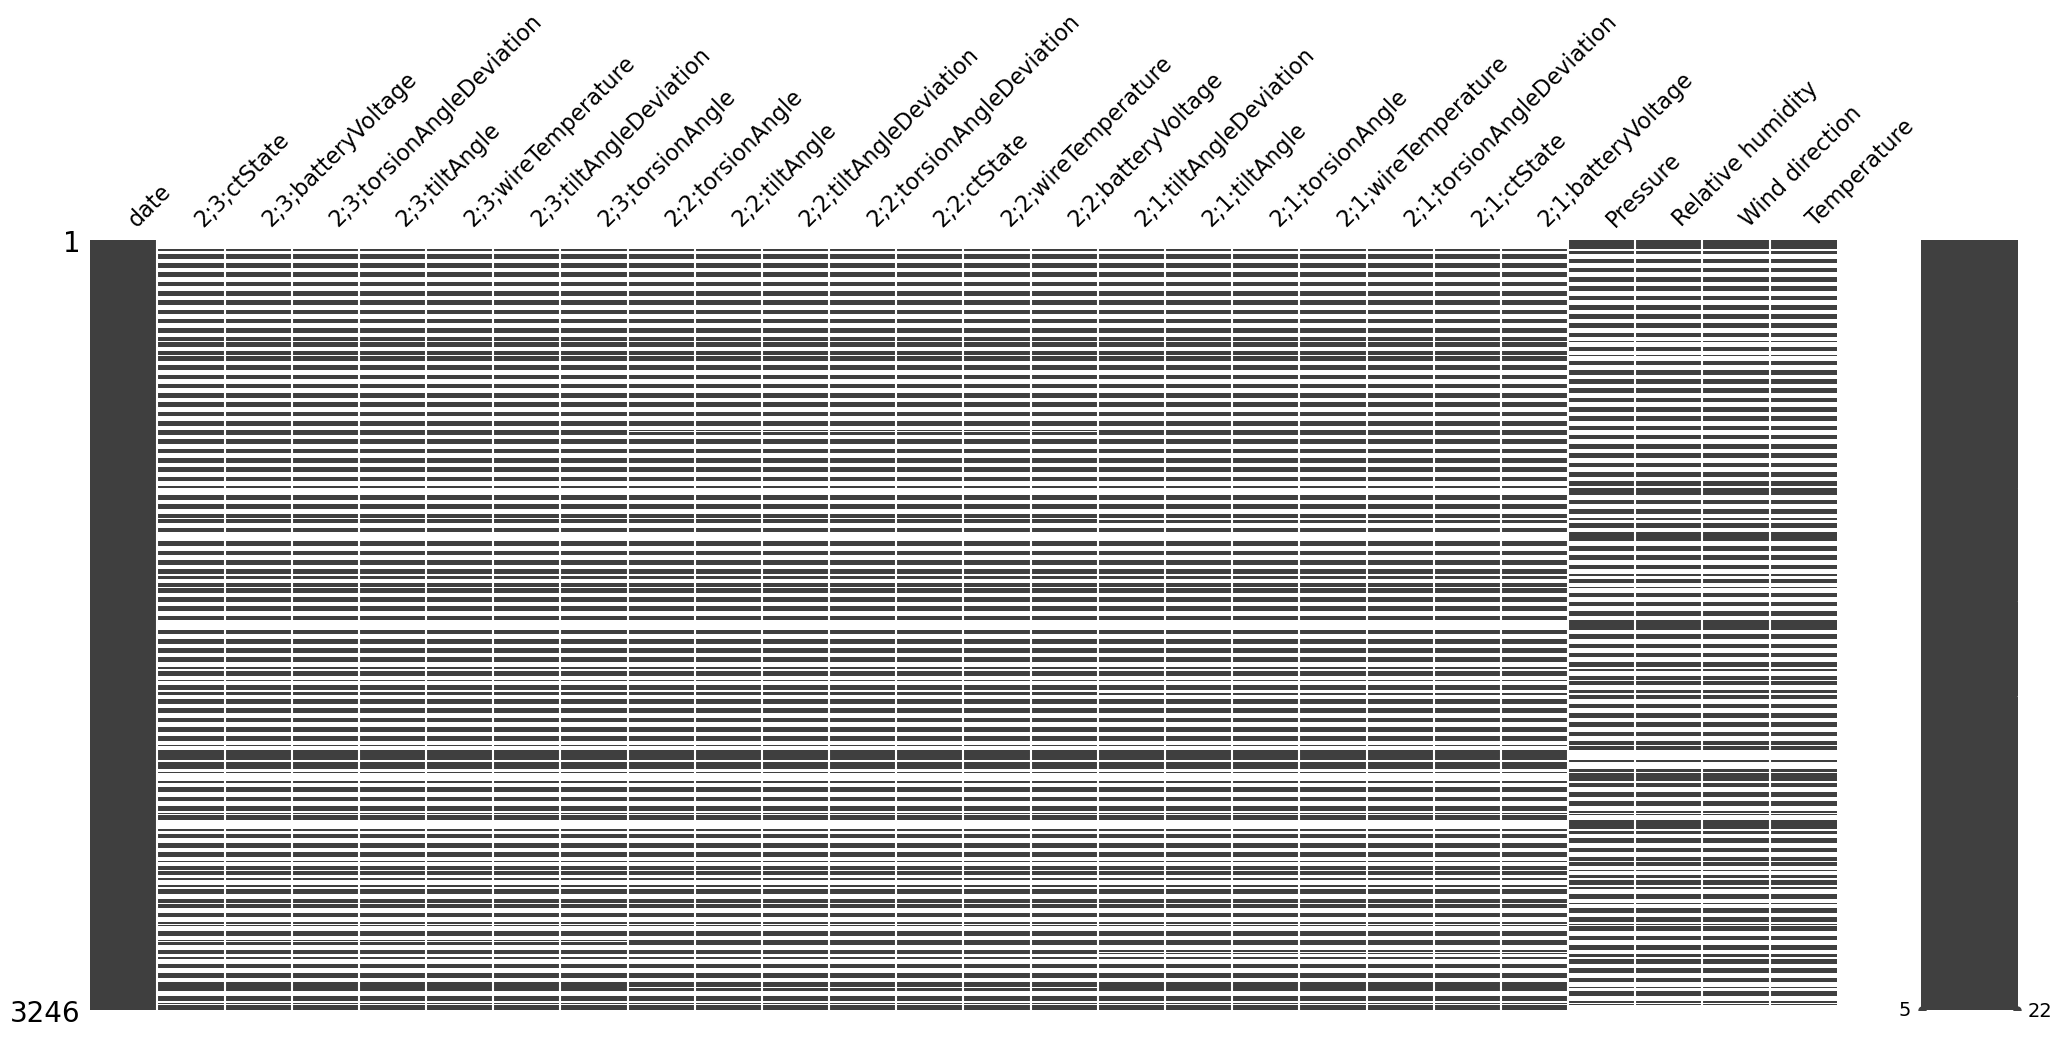

In [39]:
msno.matrix(group_2_other);

Для компенсации запаздывания выполним сдвиг данных СКН на 1 индекс относительно метеоданных:

In [40]:
group_2_other_skn = group_2_other[group_2_other.columns[1:22]].shift(-1)

In [41]:
group_2_other_meteo = pd.concat([group_2_other[group_2_other.columns[22:26]], group_2_other['date']], axis=1)

Объединим данные:

In [42]:
group_2_other = pd.concat([group_2_other_meteo, group_2_other_skn], axis=1)

Выведем первые 5 строк:

In [43]:
group_2_other.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,2;3;ctState,2;3;batteryVoltage,2;3;torsionAngleDeviation,2;3;tiltAngle,2;3;wireTemperature,...,2;2;ctState,2;2;wireTemperature,2;2;batteryVoltage,2;1;tiltAngleDeviation,2;1;tiltAngle,2;1;torsionAngle,2;1;wireTemperature,2;1;torsionAngleDeviation,2;1;ctState,2;1;batteryVoltage
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,1.0,4.2,2.0,-2.83,-11.1,...,1.0,-10.0,4.1,1.0,3.28,-1.24,-8.6,1.0,1.0,4.2
1,NaN,NaN,NaN,NaN,2023-02-14 05:18:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,1.0,4.2,3.0,-3.07,-8.6,...,1.0,-7.8,4.2,2.0,3.34,-0.86,-7.3,2.0,1.0,4.2
3,NaN,NaN,NaN,NaN,2023-02-14 05:27:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,1.0,4.2,1.0,-2.81,-8.2,...,1.0,-6.3,4.1,1.0,3.34,-1.01,-6.3,1.0,1.0,4.2


Визуализируем пропуски:

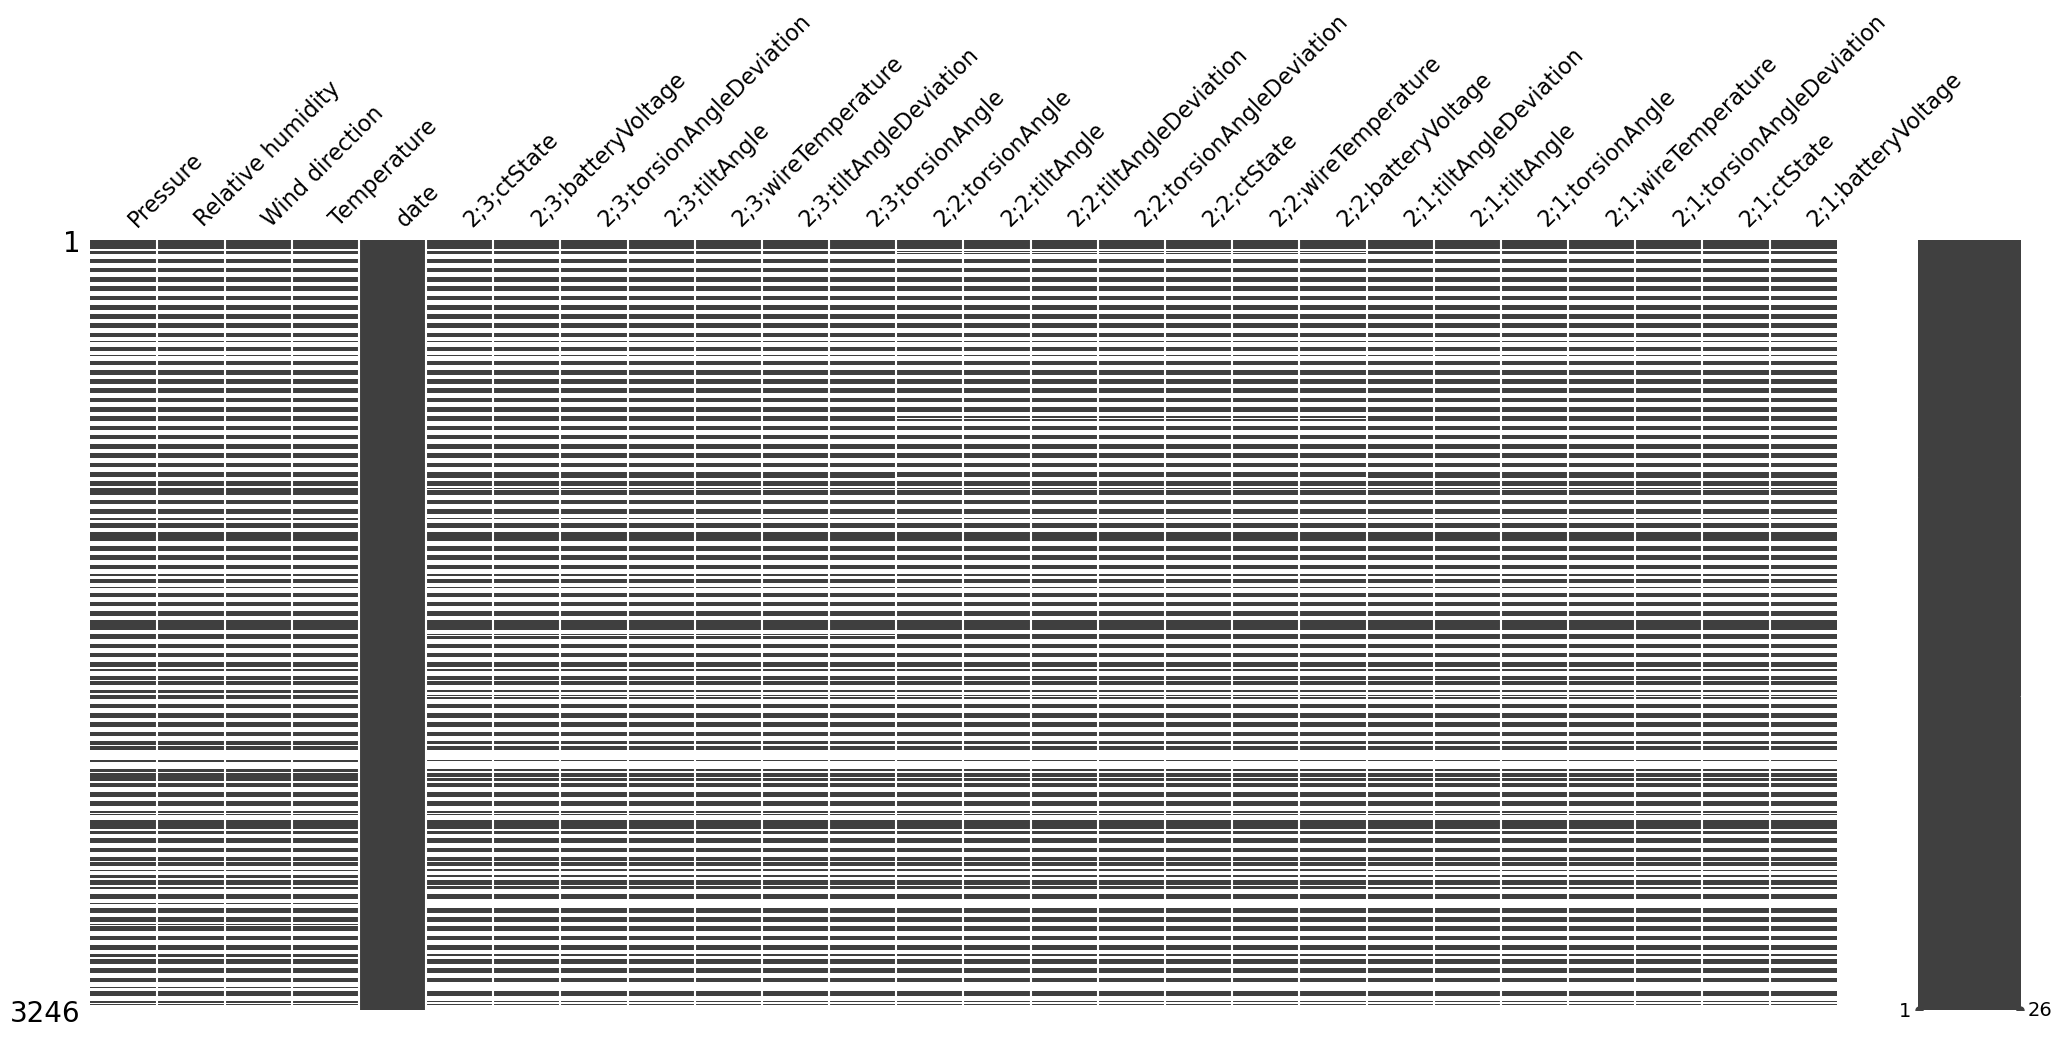

In [44]:
msno.matrix(group_2_other);

Отлично, данные приведены в соответствие. Теперь удалим пустые строки и объедним все данные первой группы:

In [45]:
group_2 = pd.concat([group_2_other.dropna().reset_index(drop=True), group_2_temp])

Выведем первые 5 строк и основную информацию о датафрейме:

In [46]:
group_2.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,2;3;ctState,2;3;batteryVoltage,2;3;torsionAngleDeviation,2;3;tiltAngle,2;3;wireTemperature,...,2;2;ctState,2;2;wireTemperature,2;2;batteryVoltage,2;1;tiltAngleDeviation,2;1;tiltAngle,2;1;torsionAngle,2;1;wireTemperature,2;1;torsionAngleDeviation,2;1;ctState,2;1;batteryVoltage
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,1.0,4.2,2.0,-2.83,-11.1,...,1.0,-10.0,4.1,1.0,3.28,-1.24,-8.6,1.0,1.0,4.2
1,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,1.0,4.2,3.0,-3.07,-8.6,...,1.0,-7.8,4.2,2.0,3.34,-0.86,-7.3,2.0,1.0,4.2
2,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,1.0,4.2,1.0,-2.81,-8.2,...,1.0,-6.3,4.1,1.0,3.34,-1.01,-6.3,1.0,1.0,4.2
3,946.29,78.0,256.0,-17.84,2023-02-14 05:45:00,1.0,4.2,2.0,-3.00,-7.4,...,1.0,-5.5,4.1,1.0,3.24,-0.85,-6.1,1.0,1.0,4.2
4,946.29,78.0,238.0,-17.84,2023-02-14 05:55:00,1.0,4.2,1.0,-2.89,-7.5,...,1.0,-6.3,4.1,1.0,3.25,-0.83,-6.3,1.0,1.0,4.2


In [47]:
group_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2932 entries, 0 to 1349
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Pressure                   2932 non-null   float64       
 1   Relative humidity          2932 non-null   float64       
 2   Wind direction             2932 non-null   float64       
 3   Temperature                2932 non-null   float64       
 4   date                       2932 non-null   datetime64[ns]
 5   2;3;ctState                2932 non-null   float64       
 6   2;3;batteryVoltage         2932 non-null   float64       
 7   2;3;torsionAngleDeviation  2932 non-null   float64       
 8   2;3;tiltAngle              2932 non-null   float64       
 9   2;3;wireTemperature        2932 non-null   float64       
 10  2;3;tiltAngleDeviation     2932 non-null   float64       
 11  2;3;torsionAngle           2932 non-null   float64       
 12  2;2;to

Вычислим долю потери данных при предобработке:

In [48]:
1 - len(group_2) / len_before_2

0.020380888740394232

Первая группа данных готова. Потери данных при предобработке не более 2.1%.

Данные второй группы готовы.

### Предобработка данных: вывод

Данные предобработаны согласно условиям:

1) если после отправки данных метеостанцией в течении не более 10 минут приходят данные с СКН - объеденить эти данные с меткой времени данных метеостанции;

2) если после отправки данных метеостанцией в течении не более 10 минут данные с СКН так и не пришли - поставить None;

3) если данные метеостанции и СКН совпали по метке времени ничего не делать.

**Потери данных при предобработке не более 2.1%.**

Предобработанные данные хранятся в датафреймах: `group_1`, `group_2`. 

## Исследовательский анализ данных

### Первая группа

Проведем исследовательский анализ первой группы данных. Выведем первые пять строк:

In [49]:
group_1.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,1;3;tiltAngle,1;3;tiltAngleDeviation,1;3;ctState,1;3;torsionAngle,1;3;wireTemperature,1;3;torsionAngleDeviation,1;3;batteryVoltage,1;1;tiltAngleDeviation,1;1;torsionAngleDeviation,1;1;torsionAngle,1;1;wireTemperature,1;1;batteryVoltage,1;1;tiltAngle,1;1;ctState
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,2.83,0.0,1.0,-5.87,-14.2,1.0,4.1,2.0,3.0,-5.16,-14.9,4.1,0.29,1.0
1,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,2.65,1.0,1.0,-5.82,-13.8,1.0,4.1,3.0,4.0,-4.51,-14.5,4.1,-0.57,1.0
2,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,2.98,0.0,1.0,-5.76,-13.7,1.0,4.1,2.0,3.0,-5.26,-14.3,4.2,0.36,1.0
3,946.29,78.0,256.0,-17.84,2023-02-14 05:45:00,3.00,0.0,1.0,-5.85,-13.5,0.0,4.1,1.0,1.0,-5.42,-13.8,4.1,0.36,1.0
4,946.29,78.0,238.0,-17.84,2023-02-14 05:55:00,2.97,0.0,1.0,-5.85,-13.6,0.0,4.1,0.0,1.0,-5.53,-14.2,4.1,0.28,1.0


Выведем основные статистические характеристики датафрейма:

In [50]:
group_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pressure,2941.0,932.405712,9.546551,912.18,927.09,934.20,940.20,947.49
Relative humidity,2941.0,85.340360,6.586791,59.00,81.00,85.00,91.00,94.00
Wind direction,2941.0,222.215573,52.933122,1.00,195.00,226.00,255.00,358.00
Temperature,2941.0,-20.829840,6.589067,-35.43,-27.07,-19.59,-15.46,-8.17
1;3;tiltAngle,2941.0,2.283373,0.982600,-8.75,2.03,2.41,2.78,6.10
1;3;tiltAngleDeviation,2941.0,5.286637,9.177712,0.00,1.00,2.00,5.00,70.00
1;3;ctState,2941.0,0.910915,0.284915,0.00,1.00,1.00,1.00,1.00
1;3;torsionAngle,2941.0,-5.103910,0.929655,-20.15,-5.28,-5.05,-4.77,2.94
1;3;wireTemperature,2941.0,-17.797552,5.444218,-29.10,-22.10,-17.60,-13.70,-6.40
1;3;torsionAngleDeviation,2941.0,6.481809,12.506166,0.00,1.00,1.00,4.00,75.00


И распределение значений каждого признака:

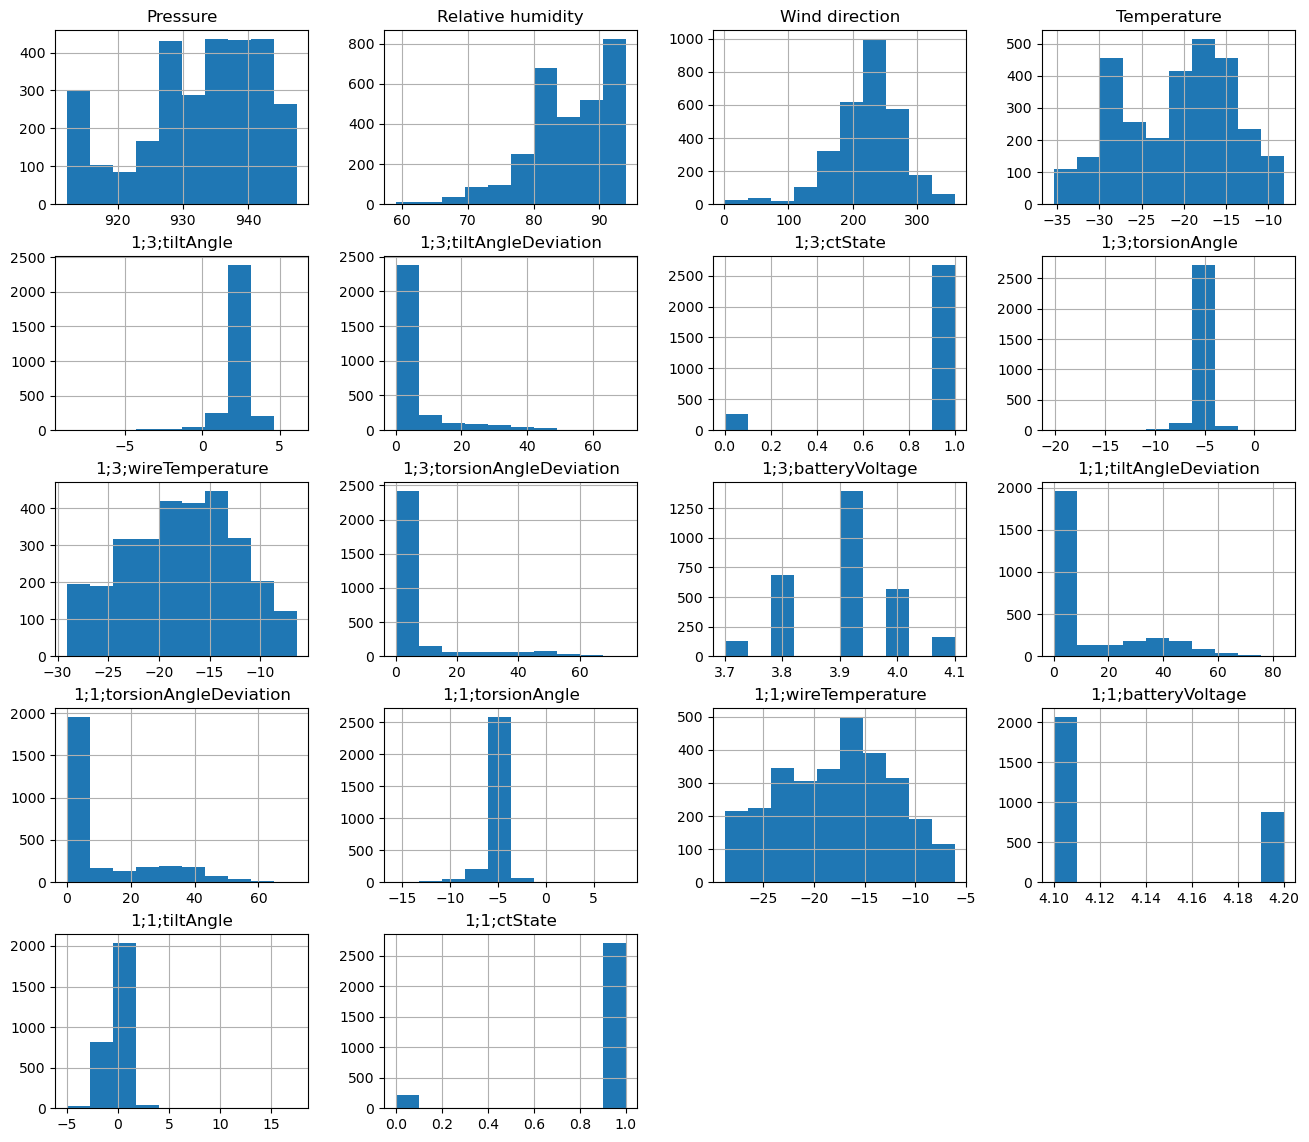

In [51]:
group_1.drop('date', axis=1).hist(figsize=(16, 14));

Признаки не вызывают вопросов, аномалий не замечено. Стоит отметить, что целевые признаки углов кручения и наклона распределены нормально. Интересный вид имеет температура воздуха - по сути это два нормальных распределения, с пиками средней ночной и дневной температур. У показателя температуры провода на устройстве 1.1 также прослеживаются эти два пика, а на устройве 1.3 этого не замечено. 

У признака относительной влажности тоже имеется два пика, несмотря на то, что правая часть нормального распределения "отрезана". Это связано с тем, что относительная влажность при данной температуре достигает своего максимального значения, и, скорее всего, с чувствительностью датчика. 

Распределения значений СКО напоминают собой логнормальные распределения. Это не позволяет использовать коэффициент корреляции Пирсона, который является параметрической мерой (работает только с нормальным распределением). Поэтому его использование с признаками СКО может привести к ошибочным выводам. Непараметрической мерой корреляции является ранговый коэффициент Спирмена **, причем его использование поможет избежать кластеризации данных по меткам день\ночь.**  

Построим тепловую карту матрицы парных корреляций Спирмена:

In [84]:
correlation_matrix_1 = group_1.drop('date', axis=1).corr(method='spearman')

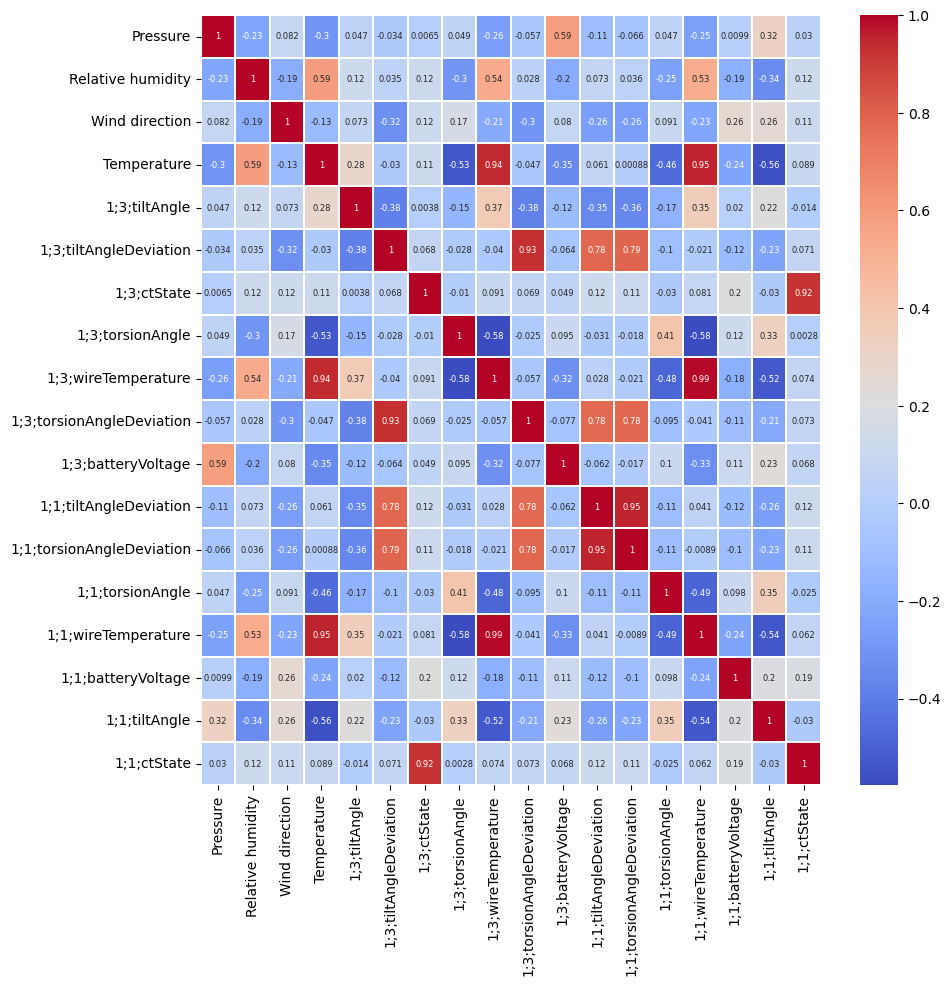

In [126]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix_1, cmap='coolwarm', annot=True, linewidths=0.25, annot_kws={'size': 6});

Важно отметить, что коэффициенты корреляции признаков `ctState` принимать во внимание не следует, так как они категориальные. Признаки СКО углов кручения и наклона одних и тех же устройств линейнозависимы (дублируют друг-друга).

Визуализируем численные значения коэффициентов корреляции для целевых признаков разных устройств:

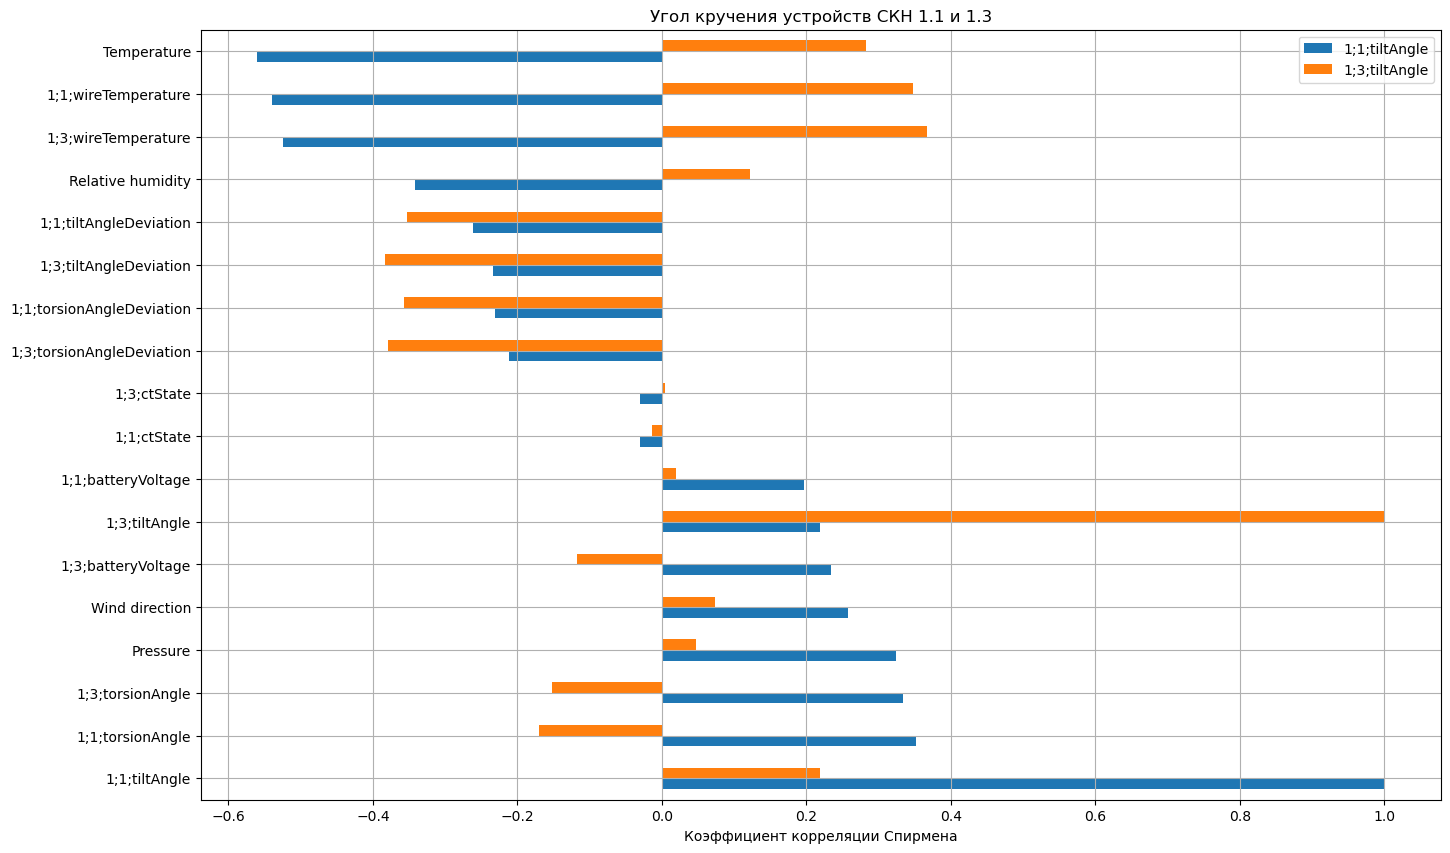

In [118]:
correlation_matrix_1[['1;1;tiltAngle',
                      '1;3;tiltAngle']].sort_values(ascending=False, 
                                                    by='1;1;tiltAngle').plot.barh(grid=True,
                                                                                  figsize=(16, 10))
plt.title('Угол кручения устройств СКН 1.1 и 1.3')
plt.xlabel('Коэффициент корреляции Спирмена');

Крайне интересно то, что у устройств из одной группы не только разная сила корреляции, но и противоположный знак коэффициента корреляции по:

1) температуре воздуха, проводов и относительной влажности воздуха;

2) напряжению батареи;

3) углу наклона.

Анализ второй группы из трех устройств, возможно, поможет прояснить картину.

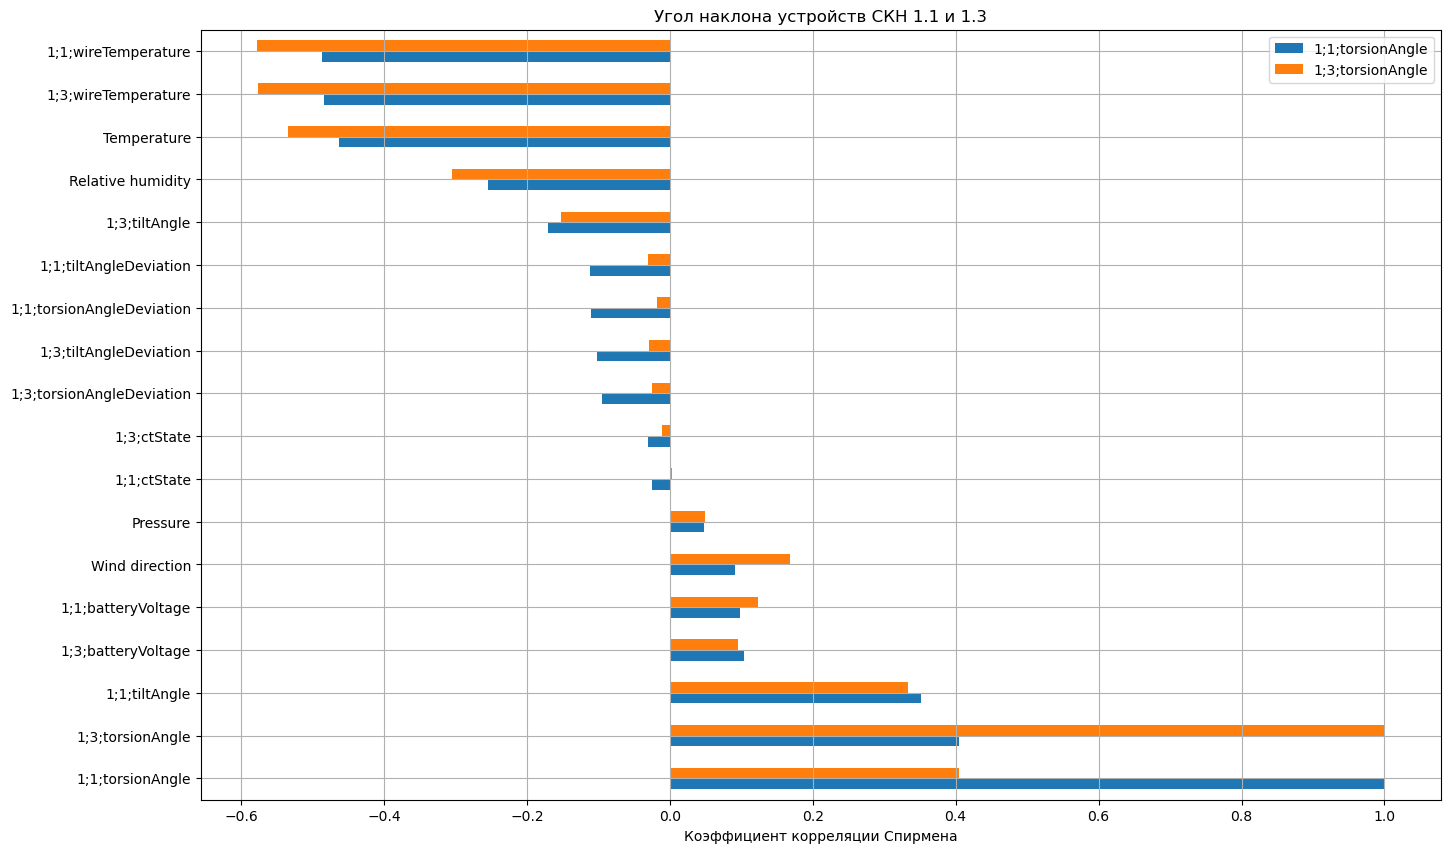

In [119]:
correlation_matrix_1[['1;1;torsionAngle',
                      '1;3;torsionAngle']].sort_values(ascending=False, 
                                                       by='1;1;torsionAngle').plot.barh(grid=True,
                                                                                        figsize=(16, 10))
plt.title('Угол наклона устройств СКН 1.1 и 1.3')
plt.xlabel('Коэффициент корреляции Спирмена');

А для угла наклона знаки корреляционных коэффициентов устройств одной группы совпадают, хоть и имеют разную силу. 

Важно отметить, что коэффициенты корреляции углов наклона и углов кругчения на разных устройствах практически полностью совпадают.

### Вторая группа

Проведем исследовательский анализ второй группы данных. Выведем первые пять строк:

In [127]:
group_2.head()

,Pressure,Relative humidity,Wind direction,Temperature,date,2;3;ctState,2;3;batteryVoltage,2;3;torsionAngleDeviation,2;3;tiltAngle,2;3;wireTemperature,...,2;2;ctState,2;2;wireTemperature,2;2;batteryVoltage,2;1;tiltAngleDeviation,2;1;tiltAngle,2;1;torsionAngle,2;1;wireTemperature,2;1;torsionAngleDeviation,2;1;ctState,2;1;batteryVoltage
0,946.38,78.0,235.0,-18.60,2023-02-14 05:15:00,1.0,4.2,2.0,-2.83,-11.1,...,1.0,-10.0,4.1,1.0,3.28,-1.24,-8.6,1.0,1.0,4.2
1,946.38,78.0,249.0,-18.60,2023-02-14 05:25:00,1.0,4.2,3.0,-3.07,-8.6,...,1.0,-7.8,4.2,2.0,3.34,-0.86,-7.3,2.0,1.0,4.2
2,946.29,77.0,261.0,-19.08,2023-02-14 05:35:00,1.0,4.2,1.0,-2.81,-8.2,...,1.0,-6.3,4.1,1.0,3.34,-1.01,-6.3,1.0,1.0,4.2
3,946.29,78.0,256.0,-17.84,2023-02-14 05:45:00,1.0,4.2,2.0,-3.00,-7.4,...,1.0,-5.5,4.1,1.0,3.24,-0.85,-6.1,1.0,1.0,4.2
4,946.29,78.0,238.0,-17.84,2023-02-14 05:55:00,1.0,4.2,1.0,-2.89,-7.5,...,1.0,-6.3,4.1,1.0,3.25,-0.83,-6.3,1.0,1.0,4.2


Выведем основные статистические характеристики датафрейма:

In [128]:
group_2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pressure,2932.0,932.391201,9.553337,912.18,927.09,934.20,940.2000,947.49
Relative humidity,2932.0,85.356071,6.577628,59.00,81.00,85.00,91.0000,94.00
Wind direction,2932.0,222.196794,53.005003,1.00,195.00,226.00,255.0000,358.00
Temperature,2932.0,-20.829744,6.587244,-35.43,-27.07,-19.59,-15.4500,-8.17
2;3;ctState,2932.0,0.928718,0.257340,0.00,1.00,1.00,1.0000,1.00
2;3;batteryVoltage,2932.0,4.174079,0.047847,4.10,4.10,4.20,4.2000,4.30
2;3;torsionAngleDeviation,2932.0,7.361187,9.965764,0.00,2.00,3.00,7.0000,57.00
2;3;tiltAngle,2932.0,-2.925866,0.603496,-7.05,-3.32,-3.01,-2.6000,-0.04
2;3;wireTemperature,2932.0,-17.387722,5.791362,-28.20,-22.50,-16.70,-12.9000,-5.80
2;3;tiltAngleDeviation,2932.0,8.915075,13.375401,0.00,2.00,3.00,7.0000,65.00


И распределение значений каждого признака:

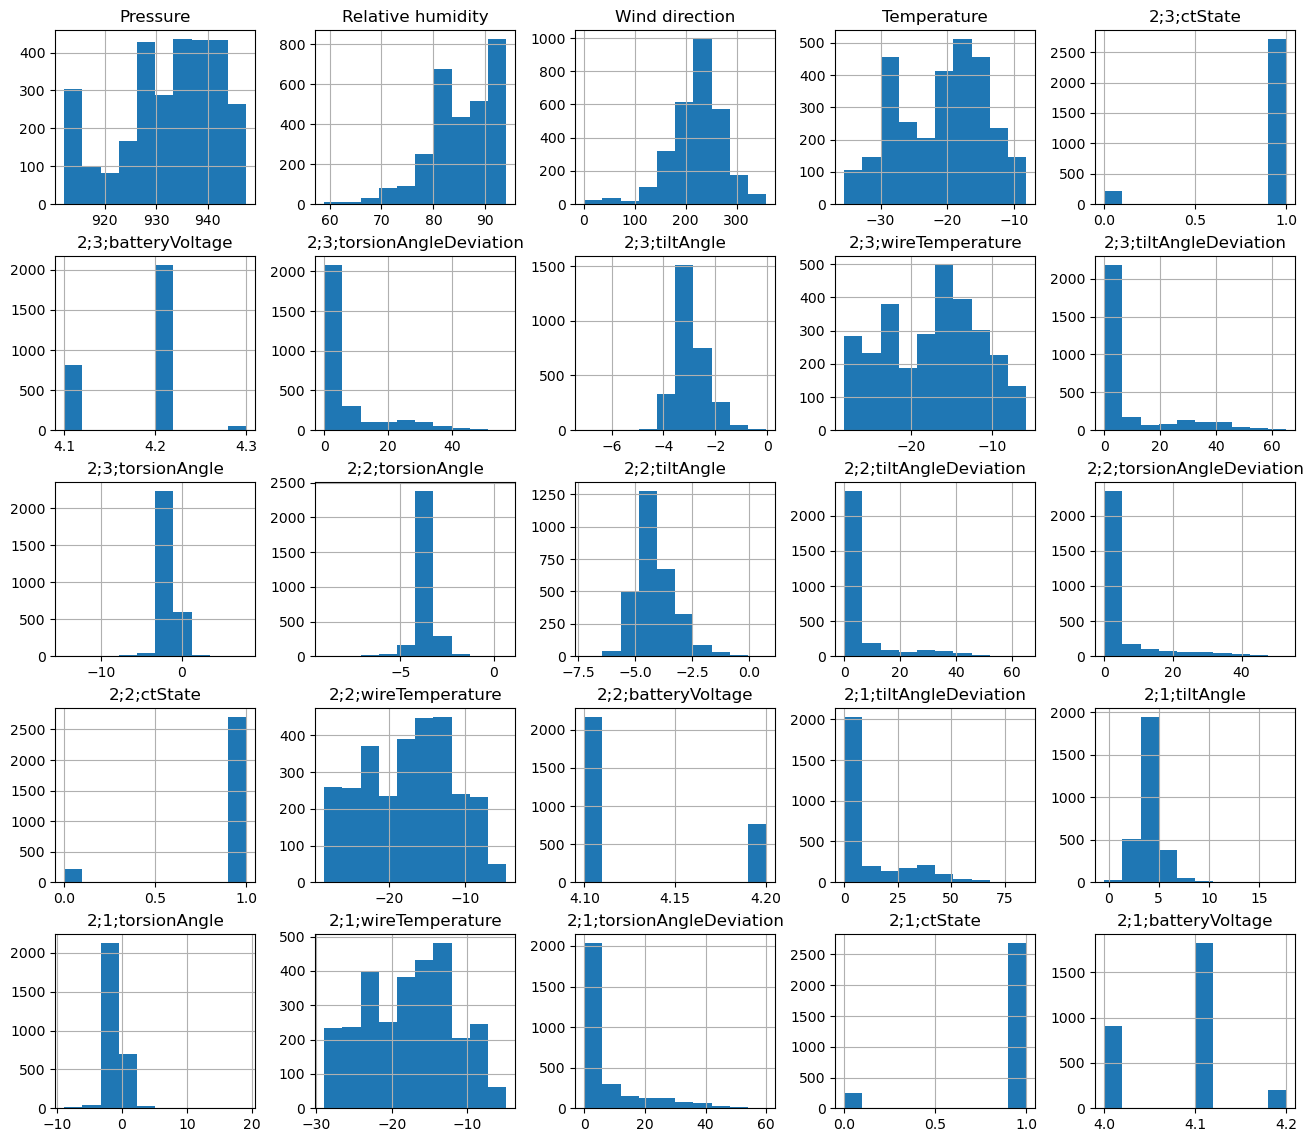

In [129]:
group_2.drop('date', axis=1).hist(figsize=(16, 14));

Признаки не вызывают вопросов, аномалий не замечено. Стоит отметить, что целевые признаки углов кручения и наклона распределены нормально. Интересный вид имеет температура воздуха - по сути это два нормальных распределения, с пиками средней ночной и дневной температур. У показателя температуры провода на устройстве 1.1 также прослеживаются эти два пика, а на устройве 1.3 этого не замечено. 

У признака относительной влажности тоже имеется два пика, несмотря на то, что правая часть нормального распределения "отрезана". Это связано с тем, что относительная влажность при данной температуре достигает своего максимального значения, и, скорее всего, с чувствительностью датчика. 

Распределения значений СКО напоминают собой логнормальные распределения. Это не позволяет использовать коэффициент корреляции Пирсона, который является параметрической мерой (работает только с нормальным распределением). Поэтому его использование с признаками СКО может привести к ошибочным выводам. Непараметрической мерой корреляции является ранговый коэффициент Спирмена **, причем его использование поможет избежать кластеризации данных по меткам день\ночь.**  

Построим тепловую карту матрицы парных корреляций Спирмена:

In [130]:
correlation_matrix_2 = group_2.drop('date', axis=1).corr(method='spearman')

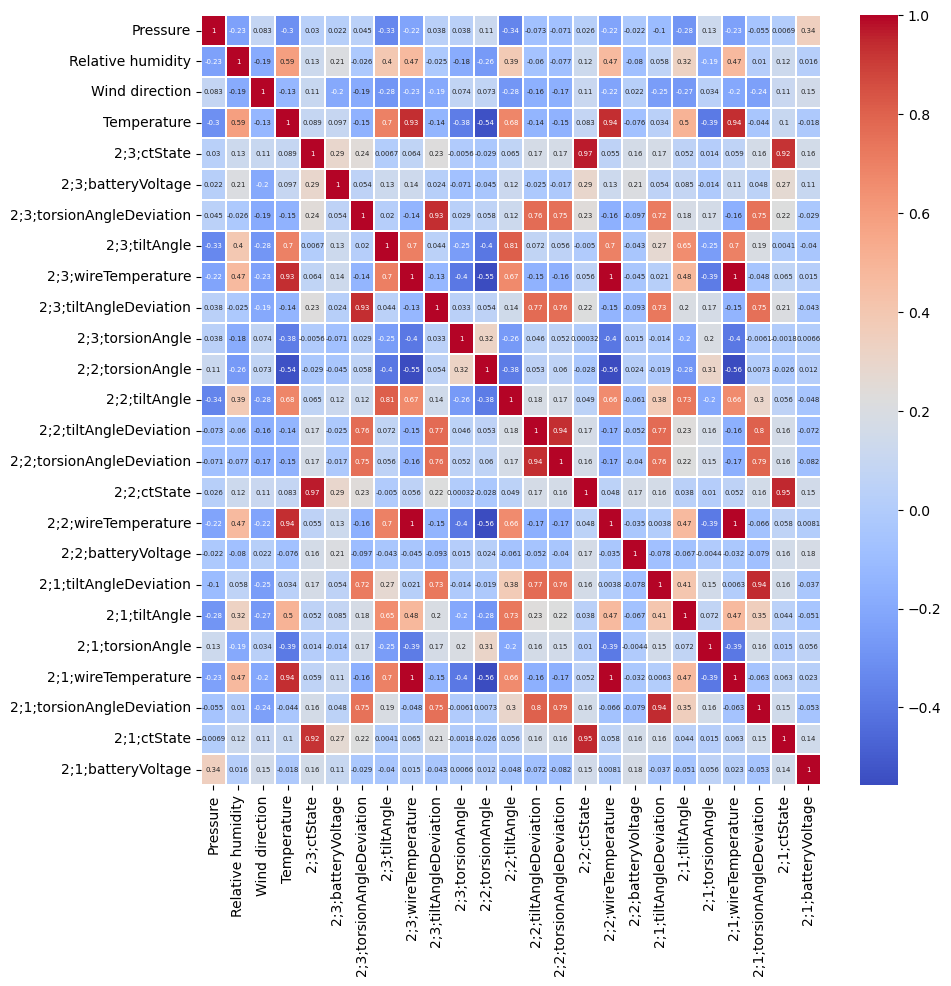

In [132]:
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix_2, cmap='coolwarm', annot=True, linewidths=0.25, annot_kws={'size': 5});

Важно отметить, что коэффициенты корреляции признаков `ctState` принимать во внимание не следует, так как они категориальные. Признаки СКО углов кручения и наклона одних и тех же устройств линейнозависимы (дублируют друг-друга).

Визуализируем численные значения коэффициентов корреляции для целевых признаков разных устройств:

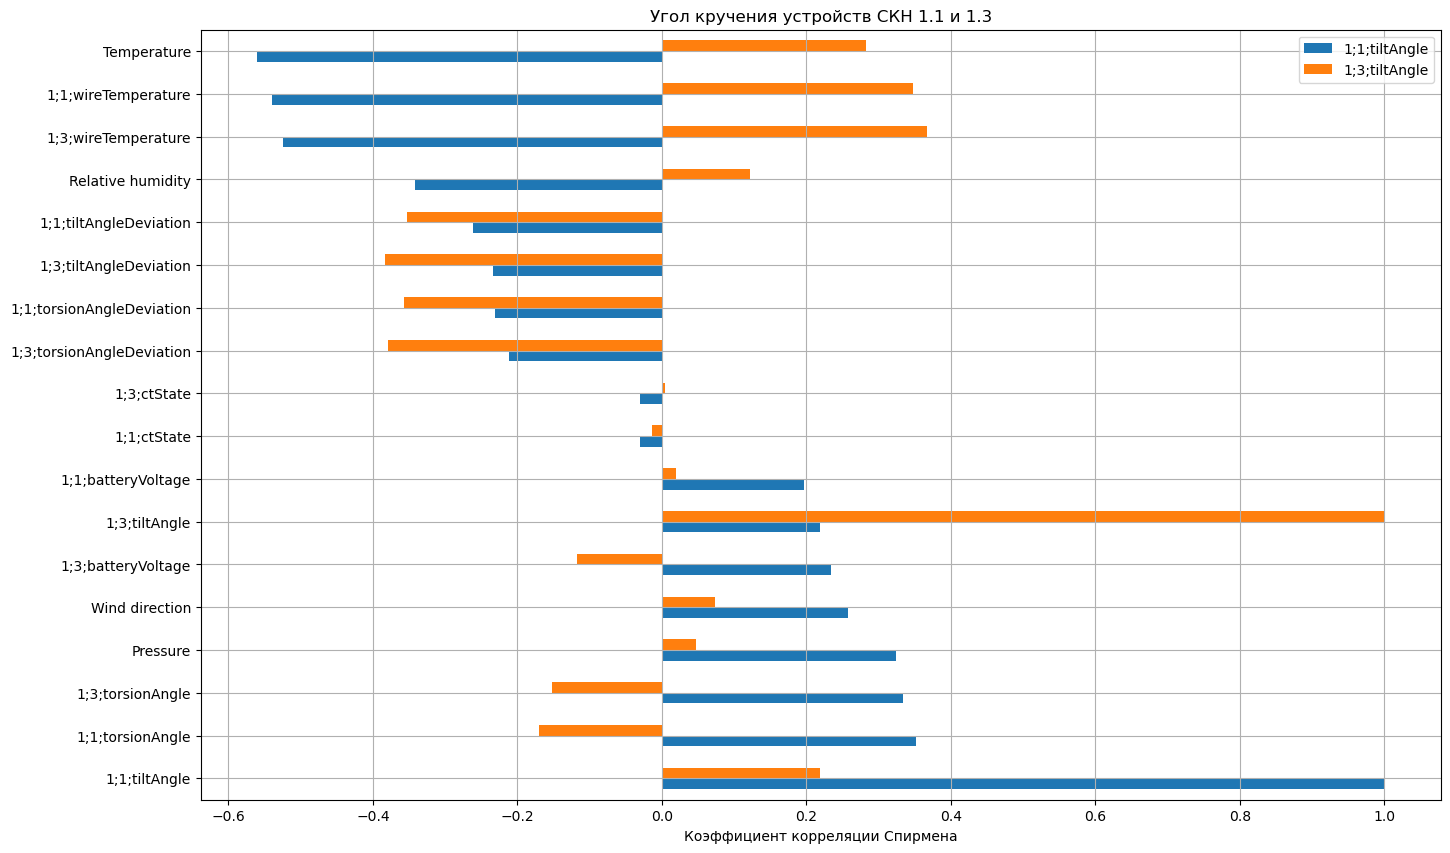

In [118]:
correlation_matrix_1[['1;1;tiltAngle',
                      '1;3;tiltAngle']].sort_values(ascending=False, 
                                                    by='1;1;tiltAngle').plot.barh(grid=True,
                                                                                  figsize=(16, 10))
plt.title('Угол кручения устройств СКН 1.1 и 1.3')
plt.xlabel('Коэффициент корреляции Спирмена');

Крайне интересно то, что у устройств из одной группы не только разная сила корреляции, но и противоположный знак коэффициента корреляции по:

1) температуре воздуха, проводов и относительной влажности воздуха;

2) напряжению батареи;

3) углу наклона.

Анализ второй группы из трех устройств, возможно, поможет прояснить картину.

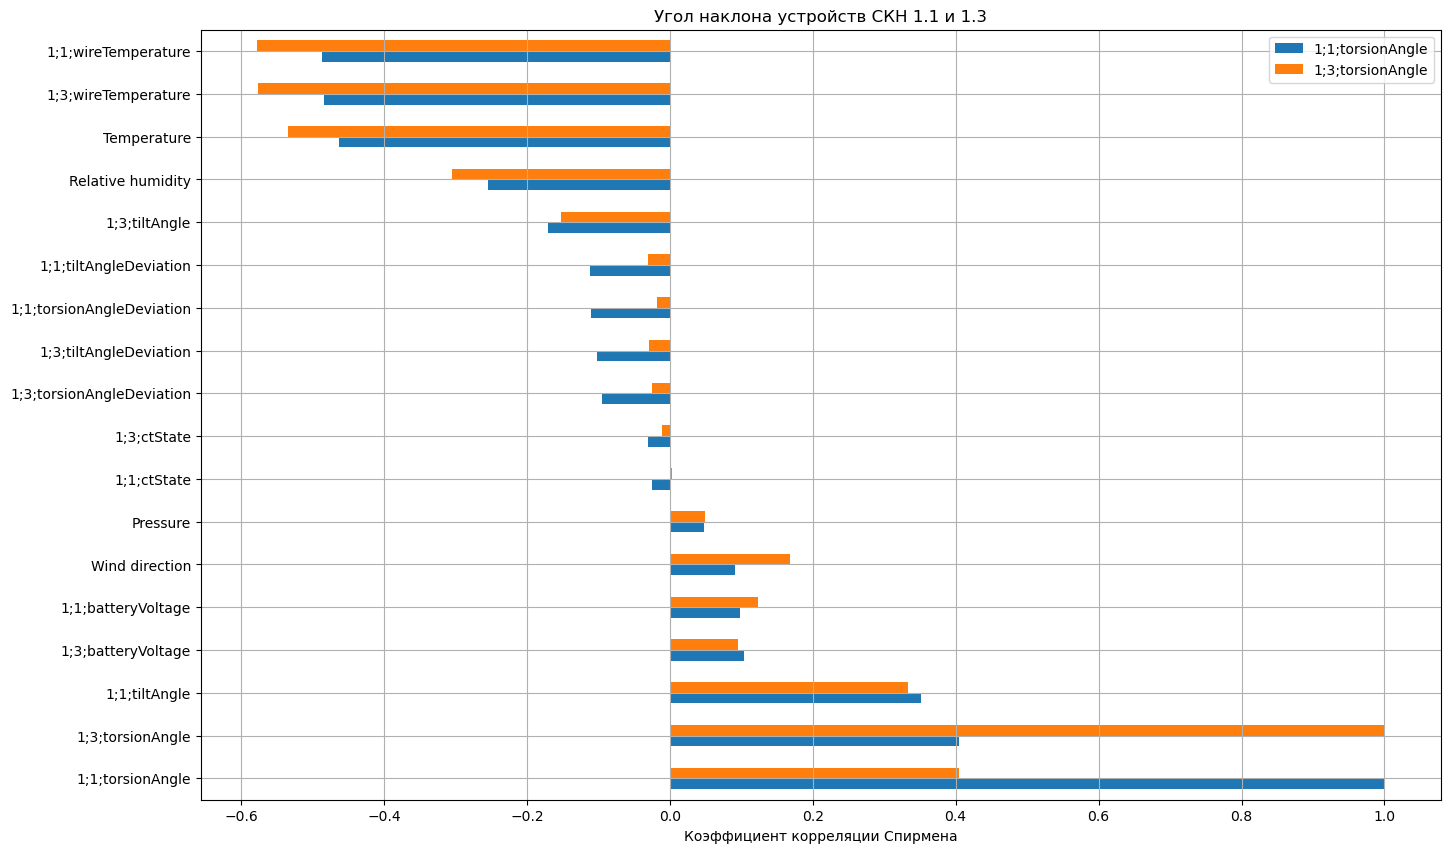

In [119]:
correlation_matrix_1[['1;1;torsionAngle',
                      '1;3;torsionAngle']].sort_values(ascending=False, 
                                                       by='1;1;torsionAngle').plot.barh(grid=True,
                                                                                        figsize=(16, 10))
plt.title('Угол наклона устройств СКН 1.1 и 1.3')
plt.xlabel('Коэффициент корреляции Спирмена');

А для угла наклона знаки корреляционных коэффициентов устройств одной группы совпадают, хоть и имеют разную силу. 

Важно отметить, что коэффициенты корреляции углов наклона и углов кругчения на разных устройствах практически полностью совпадают.